<a href="https://colab.research.google.com/github/ziza595/COVID19_SEN_PROJECT/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Statistique sur les données covid-19 au Sénégal
---

In [1]:
data_path = "/content/drive/MyDrive/data.csv"

> __1. Enregistrer les données dans un format adapté pour une lecture par la suite avec Python sachant que la première ligne du fichier correspond au noms des variables. Convertir la colonne date en type datetime et supprimer toutes les lignes ayant une valeur manquante.__

Importons tout d'abord la bibliothèque `pandas` afin d'enrégistrer les données dans un format adapté

In [2]:
import pandas as pd
import numpy as np

Créons maintenant notre **dataframe** et chargons-y les données csv avec la fonction `read_csv` de `pandas`

In [4]:
df = pd.read_csv(data_path, sep=';')
df.head()

,date,tests,cas,contact,importe,communautaire
0,02/03/2020,1.0,1,0,0,0
1,03/03/2020,2.0,1,0,1,0
2,04/03/2020,2.0,2,1,1,0
3,05/03/2020,NaN,0,0,0,0
4,06/03/2020,2.0,0,0,0,0


Les données qui sont dans le fichier `data.csv` sont séparées par des point virgule. Et pour une bonne lecture des données nous avons utilisé l'argument `sep=';'` qui est par défaut égal à `','`.

__Par défaut `pandas` considère la première ligne comme noms des colonnes (variables)__

Convertissons à présent le type de la colonne **date** en `datetime`

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,tests,cas,contact,importe,communautaire
0,2020-02-03,1.0,1,0,0,0
1,2020-03-03,2.0,1,0,1,0
2,2020-04-03,2.0,2,1,1,0
3,2020-05-03,NaN,0,0,0,0
4,2020-06-03,2.0,0,0,0,0


Suppression des lignes ayant des valeurs manquantes :

In [8]:
df.shape

(496, 6)

Au départ notre __dataframe__ avait __496__ `observations` et __6__ `variables`

In [9]:
df.dropna(axis=0, inplace=True)
df.shape

(495, 6)

Après suppression nous nous retrouver avec **495** observations ce qui signifie que y'a une seule ligne ayant une(ou des) valeur(s) manquante(s).

> __2. Ajouter dans les données une nouvelle variable proportion qui représente le taux de positivité journalier__

Le taux de positivité est obtenue en faisant le rapport entre le nombre nombre de **cas** positif et le nombre de **tests** effectué.

In [10]:
df['proportion'] = df['cas'] / df['tests']
df.head()

,date,tests,cas,contact,importe,communautaire,proportion
0,2020-02-03,1.0,1,0,0,0,1.0
1,2020-03-03,2.0,1,0,1,0,0.5
2,2020-04-03,2.0,2,1,1,0,1.0
4,2020-06-03,2.0,0,0,0,0,0.0
5,2020-07-03,2.0,0,0,0,0,0.0


> __3. Ajouter dans les données une nouvelle variable total qui représente le nombre cumulé de cas positifs du début de la pandémie jusqu’à une certaine date__

In [11]:
df['total'] = df['cas'].cumsum()
df.head()

,date,tests,cas,contact,importe,communautaire,proportion,total
0,2020-02-03,1.0,1,0,0,0,1.0,1
1,2020-03-03,2.0,1,0,1,0,0.5,2
2,2020-04-03,2.0,2,1,1,0,1.0,4
4,2020-06-03,2.0,0,0,0,0,0.0,4
5,2020-07-03,2.0,0,0,0,0,0.0,4


> __4. Représenter les variables tests et cas en fonction de la date dans le même graphique. Ajouter une légende dans le graphique__

Pour représenter cette distribution nous allons transformer la colonne **date** en index afin de faciliter les calculs.

In [12]:
df.set_index('date', inplace=True)
df.head()

,tests,cas,contact,importe,communautaire,proportion,total
date,,,,,,,
2020-02-03,1.0,1,0,0,0,1.0,1
2020-03-03,2.0,1,0,1,0,0.5,2
2020-04-03,2.0,2,1,1,0,1.0,4
2020-06-03,2.0,0,0,0,0,0.0,4
2020-07-03,2.0,0,0,0,0,0.0,4


Ensuite, nous allons importer le module `pyplot` de `matplotlib` pour faire la visualisation

In [13]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.style.use('seaborn')

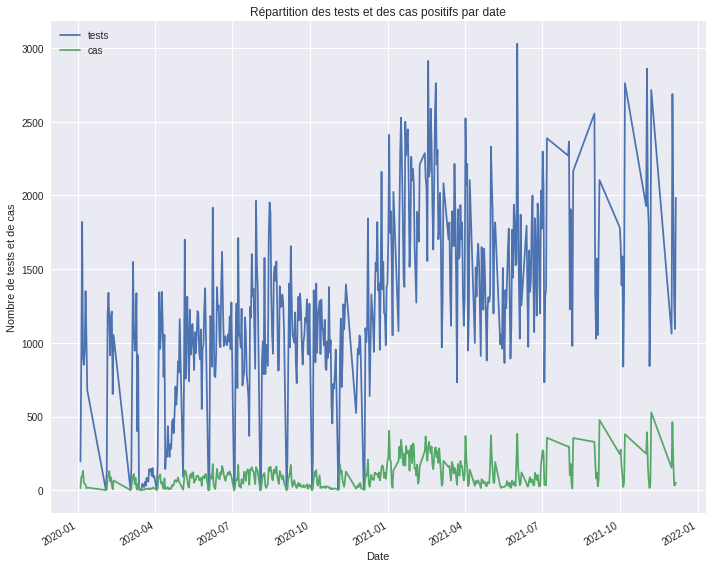

In [14]:
ax = df[['tests', 'cas']].plot(figsize=(10,8))

plt.legend(loc='upper left')
plt.title('Répartition des tests et des cas positifs par date')
plt.xlabel("Date")
plt.ylabel("Nombre de tests et de cas")

plt.tight_layout()
plt.show()

> __5. Représenter les variables communautaire et contact en fonction de la date dans le même graphique. Ajouter une légende dans le graphique__

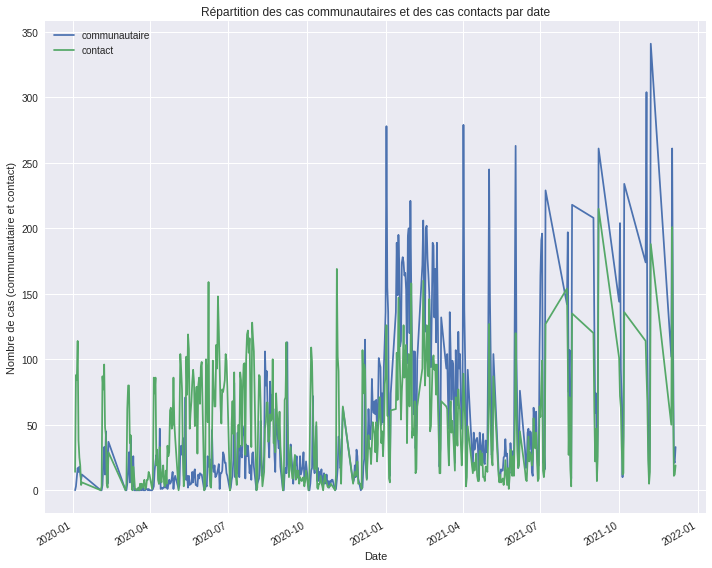

In [15]:
ax = df[['communautaire', 'contact']].plot(figsize=(10,8))

plt.legend(loc='upper left')
plt.title('Répartition des cas communautaires et des cas contacts par date')
plt.xlabel("Date")
plt.ylabel("Nombre de cas (communautaire et contact)")

plt.tight_layout()
plt.show()

> __6. Tracer le boxplot et l’histogramme de la variable cas. Conclure sur la présence ou non d’éventuelles valeurs aberrantes pour cette variable.__

Nous allons ces deux graphiques d'un seul coup à l'aide de la fonction `subplot` de `pyplot`

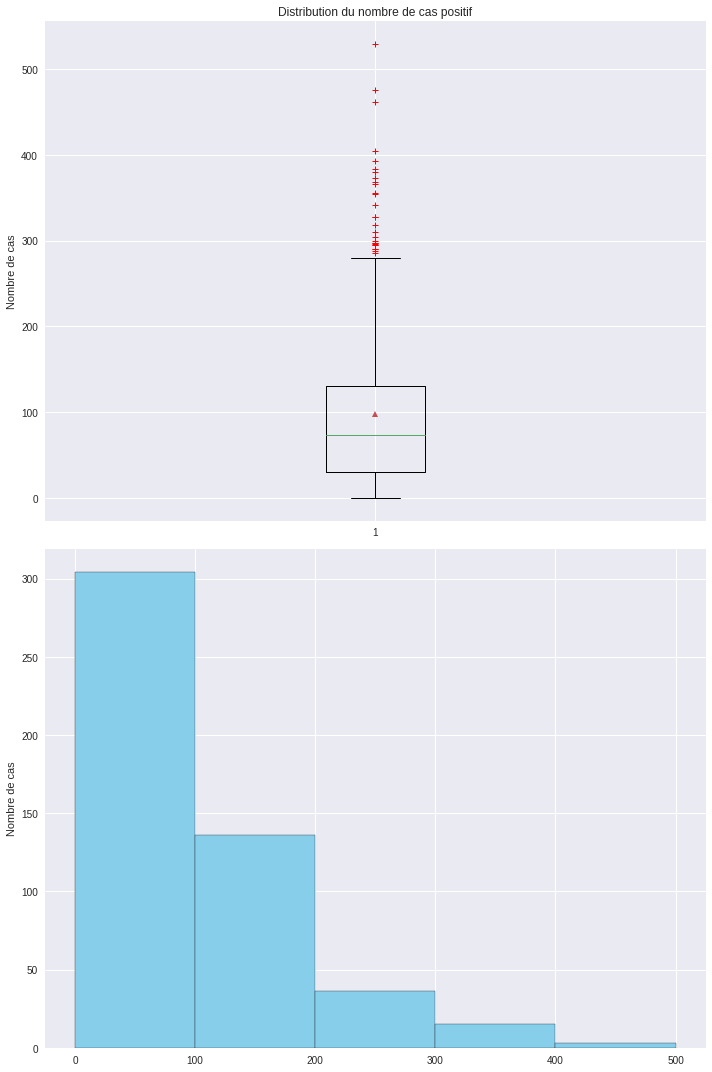

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

bins = np.arange(0, 600, 100)

ax1.boxplot(df['cas'], showmeans=True, sym='r+')
ax2.hist(df['cas'], bins=bins, edgecolor='black', color='skyblue')

ax1.set_title('Distribution du nombre de cas positif')
ax1.set_ylabel('Nombre de cas')
ax2.set_ylabel('Nombre de cas')

plt.tight_layout()
plt.show()

Le boxplot nous montre bien le présence de valeurs aberrantes qui sont représentées par le caractère `+` de couleur **rouge**.

> __7. Discrétisez la variable cas. Pour ce faire on ajoutera une variable dans le DataFrame des données une nouvelle variable nommée cas_classe. Cette variable aura 4 classes :__

> `[min(cas), Q1], ]Q1, Q2], ]Q2, Q3], ]Q3 , max(cas)]`

> Où __`Q1`__, __`Q2`__, __`Q3`__ sont respectivement les 3 premiers quantiles de la variable **cas**, __`min(cas)`__ et __`max(cas)`__ respectivement la plus petite et la plus grande valeur de la variable **cas**

Pour cela nous allons labelliser les valeurs de chaque intervalle de la manière suivante :

* la valeur __classe_1__ représente les cas qui sont dans l'intervalle __`[min(cas), Q1]`__
* la valeur __classe_2__ représente les cas qui sont dans l'intervalle __`]Q1, Q2]`__
* la valeur __classe_3__ représente les cas qui sont dans l'intervalle __`]Q2, Q3]`__
* la valeur __classe_4__ représente les cas qui sont dans l'intervalle __`]Q3 , max(cas)]`__

Ensuite, définissons les variables constituant les bornes de chaque intervalle

In [17]:
min_cas, max_cas = df['cas'].min(), df['cas'].max()
q1, q2, q3 = df['cas'].quantile([.25, .5, .75])

Puis, définissons une fonction de filtre qui prend en paramètre le **dataframe** et retourne la valeur : `classe_1`, `classe_2`, `classe_3` ou `classe_4` selon les conditions qui seront spécifiées

In [18]:
def cas_filter(data):
    """Objectif:
    
    Filtrer une serie pandas selon des conditions
    
    Méthode:
    
    Comparaison entre bornes
    
    Arguments:
    
    :param data: désigne le dataframe
    :type data: pandas.core.frame.DataFrame
    
    Retour:
    
    Une nouvelle serie
    """
    if (min_cas <= data['cas'] <= q1):
        return 'classe_1'
    elif (q1 < data['cas'] <= q2):
        return 'classe_2'
    elif (q2 < data['cas'] <= q3):
        return 'classe_3'
    elif (q3 < data['cas'] <= max_cas):
        return 'classe_4'

Appliquons cette fonction à notre **dataframe** pour construire la colonne **`cas_classe`**

In [19]:
df['cas_classe'] = df.apply(cas_filter, axis=1)

Maintenant si nous visualisons le **dataframe** voila ce que nous aurons :

> __8. Donner les fréquences des modalités de la nouvelle variable `cas_classe`__

Définissons une fonction `cas_classe_frequency` pour automatiser le traitement pour tous les cas.

***Pour le calcul de la fréquence nous avons utilisé la formule classique qui consiste à faire le rapport de l'effectif de la valeur dont on cherche sa fréquence sur le nombre total de valeur***

In [20]:
def cas_classe_frequency(classe):
    """Objectif:
    
    Compte le nombre d'occurence d'une valeur donnée
    
    Méthode:
    
    Formule de la fréquence
    
    Arguments:
    
    :param classe: désigne la valeur à rechercher
    :type classe: str
    
    Retour:
    
    La fréquence de la valeur
    """
    return round((df['cas_classe'] == classe).sum()/df['cas_classe'].count(), 3)

#### __Application :__

In [21]:
f1 = cas_classe_frequency('classe_1')
f2 = cas_classe_frequency('classe_2')
f3 = cas_classe_frequency('classe_3')
f4 = cas_classe_frequency('classe_4')

In [22]:
print(f"""
La classe 1 représente {f1*100}% des cas
La classe 2 représente {f2*100}% des cas
La classe 3 représente {f3*100}% des cas
La classe 4 représente {f4*100}% des cas""")


La classe 1 représente 25.5% des cas
La classe 2 représente 25.1% des cas
La classe 3 représente 24.4% des cas
La classe 4 représente 25.1% des cas


> __9. On suppose que la variable `cas` suit une loi binomiale négative $\mathcal{NB}(\theta, p)$, $\theta$ > 0 et 0 < p < 1__

**Calculer les estimation de $\theta$ et p en utilisant la méthode des moments**.

**Rappel :**

> En probabilité et en statistiques, la loi binomiale négative est une distribution de probabilité discrète. Elle décrit la situation suivante : une expérience consiste en une série de tirages indépendants, donnant un « succès » avec probabilité p (constante durant toute l'expérience) et un « échec » avec une probabilité complémentaire. Cette expérience se poursuit jusqu'à l'obtention d'un nombre donné n de succès. La variable aléatoire représentant le nombre d'échecs (avant l'obtention du nombre donné n de succès) suit alors une loi binomiale négative. Ses paramètres sont n, le nombre de succès attendus, et p, la probabilité d'un succès. (source wikipédia)

> Estimer un paramètre, c'est en chercher une valeur approchée de la vraie valeur en se basant sur les résultats obtenus dans un échantillon. Lorsqu'un paramètre est estimé par un seul nombre, déduit des résultats de l'échantillon, ce nombre est appelé estimation ponctuelle du paramètre.

> La méthode des moments consiste à égaler les moments empiriques avec les moments théoriques.

> Formule à utiliser :
* Si une variable aléatoire $X \sim \mathcal{NB}(\theta, p)$ alors $\mathbb{E}(X) = \frac{\theta(1 - p)}{p}$ et $\mathbb{V}(X) = \frac{\theta(1 - p)}{p^2}$
* On définit un estimateur par la méthode des moment la solution du système : $\mathbb{E}(X^k) = \mu_{k}(X), \vee k \geq 1$

In [23]:
df['cas'].mean()

97.43030303030304

In [24]:
df['cas'].var()

7877.6707397865275

On constate bien que la moyenne de la variable `cas` est faible contrairement à sa variance qui est très forte. Cela conduit à penser que l'estimation des paramètres de cette loi sera problèmatique pour les échantillons de petites tailles.

Notre défis ici sera de surmonter cette problèmatique.

On se donne une variable aléatoire (v.a.) X qui représente la variable `cas` donc $\begin{align*} X \sim \mathcal{NB}(\theta, p) \end{align*}$.

Soit $\begin{align*} (X_{1}, X_{2}, ..., X_{n}) \end{align*}$ un n-échantillon iid extraît de la v.a. X.

La moyenne empirique $\begin{align*} \bar{X_{n}} \end{align*}$ et la variance empirique $\begin{align*} S_{n}^2 \end{align*}$ sont respectivement des estimateur de $\begin{align*} \mathbb{E}(X) \end{align*}$ et $\begin{align*} \mathbb{V}(X) \end{align*}$.

Et on a :

$\begin{align*} \mathbb{E}(X) = \frac{\theta(1 - p)}{p} \end{align*}$ et $\begin{align*} \mathbb{V}(X) = \frac{\theta(1 - p)}{p^2} \end{align*}$. 

Après calculs, on déduit que : $\begin{align*} \hat{\theta} = \frac{\bar{X_n^2}}{S_n^2 - \bar{X_n}} \end{align*}$ et $\begin{align*} \hat{p} = \frac{\bar{X_n}}{S_n^2} \end{align*}$

**Définissons la fonction permettant l'estimation des deux paramètres pour plusieurs échantillons**

In [26]:
def estimation_moment(var, n):
    """Objectif:
    
    Estimer les paramètres d'une variable suivant la loi binomiale négative
    
    Méthode:
    
    Estimation par la méthode des moments
    
    Arguments:
    
    :param var: désigne la variable de la loi bin. neg.
    :type var: pandas.core.series.Series
    
    Retour:
    
    Valeurs estimées des paramètres
    """
    data = var.sample(n)
    hat_theta = (data.mean())**2/(data.var() - data.mean())
    hat_p = (data.mean())/(data.var())
    return hat_theta, hat_p

In [27]:
for i in range(20, 500, 50):
    theta_chapeau, p_chapeau = estimation_moment(df['cas'], i)
    print(f'Pour n = {i:3d} theta_chapeau = {theta_chapeau:.3f} et p_chapeau = {p_chapeau:.3f}')

Pour n =  20 theta_chapeau = 1.747 et p_chapeau = 0.013
Pour n =  70 theta_chapeau = 1.088 et p_chapeau = 0.013
Pour n = 120 theta_chapeau = 1.566 et p_chapeau = 0.017
Pour n = 170 theta_chapeau = 1.195 et p_chapeau = 0.012
Pour n = 220 theta_chapeau = 1.338 et p_chapeau = 0.013
Pour n = 270 theta_chapeau = 1.269 et p_chapeau = 0.012
Pour n = 320 theta_chapeau = 1.187 et p_chapeau = 0.012
Pour n = 370 theta_chapeau = 1.209 et p_chapeau = 0.012
Pour n = 420 theta_chapeau = 1.242 et p_chapeau = 0.012
Pour n = 470 theta_chapeau = 1.192 et p_chapeau = 0.012
